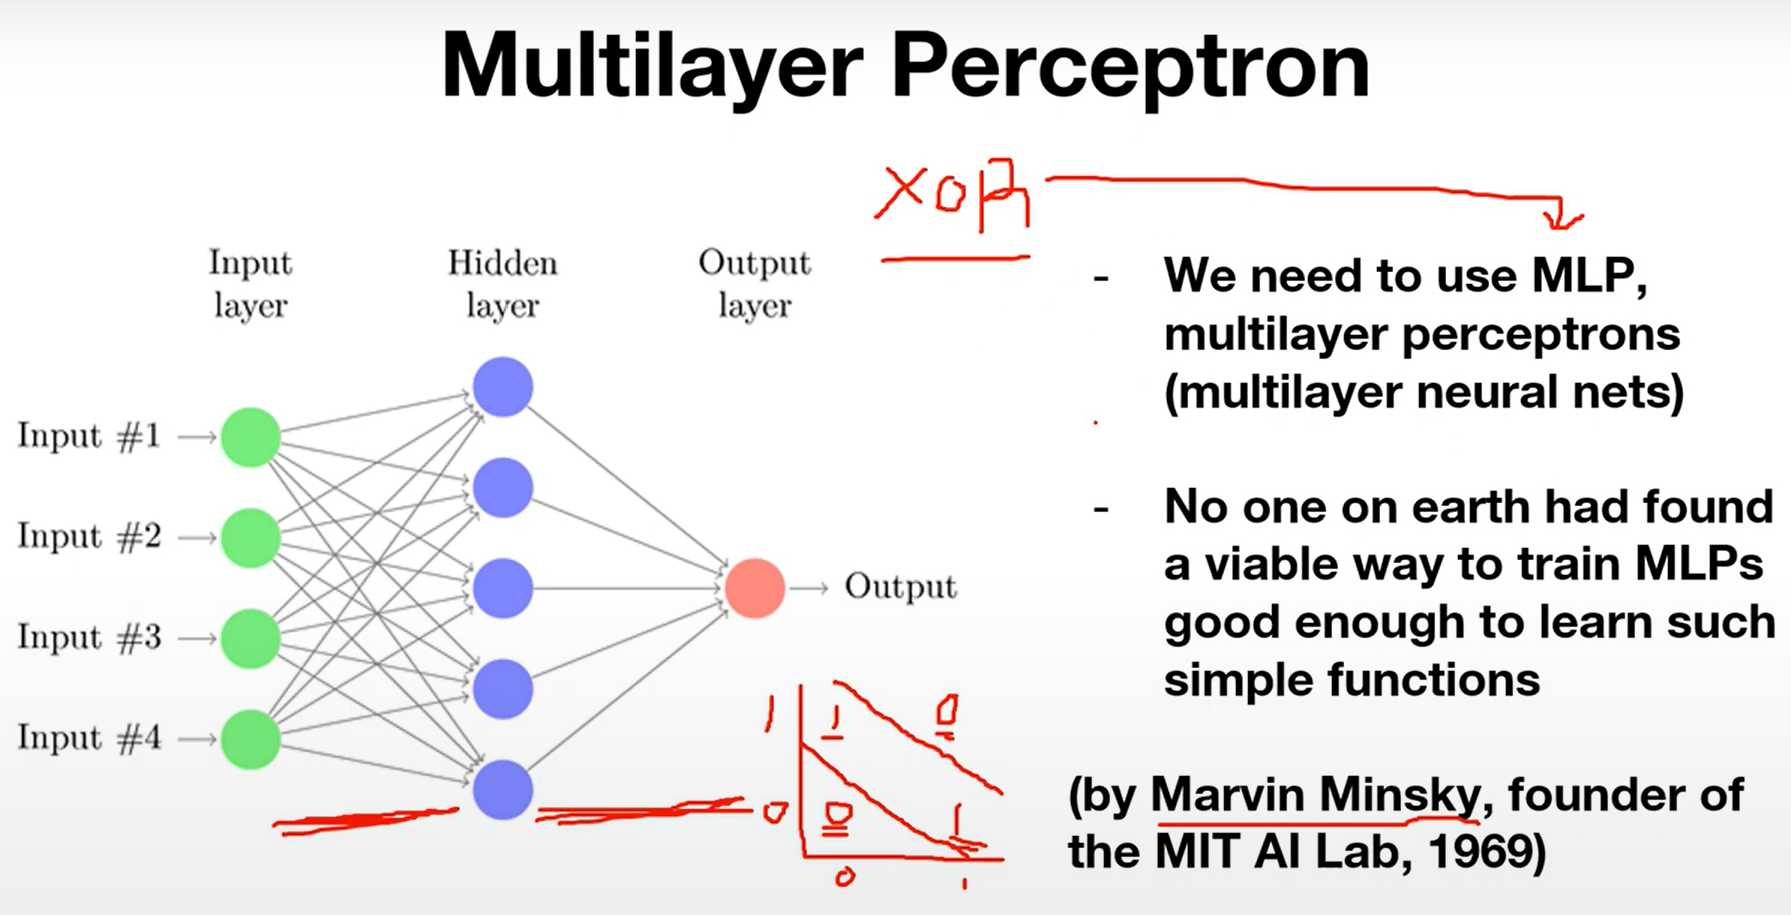

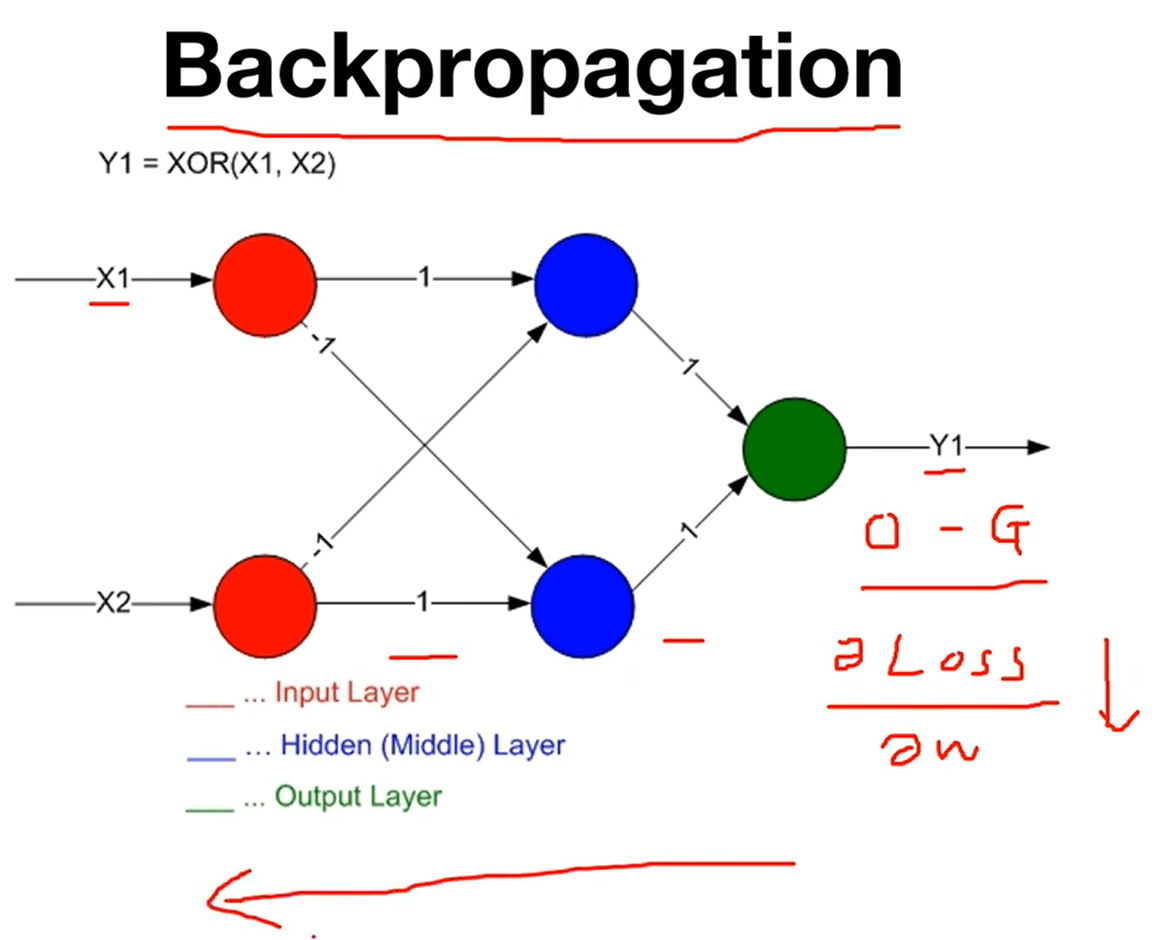

https://www.youtube.com/watch?v=573EZkzfnZ0&list=PLlMkM4tgfjnLSOjrEJN31gZATbcj_MpUm&index=28

In [8]:
#Backpropagation  
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

#nn Layers
w1 = torch.Tensor(2, 2).to(device)
b1 = torch.Tensor(2).to(device)
w2 = torch.Tensor(2, 1).to(device)
b2 = torch.Tensor(1).to(device)

def sigmoid(x):
    #sigmoid function
    return 1.0 / (1.0 + torch.exp(-x))
    #return torch.div(torch.tensor(1), torchh.add(torch.tensor(1.0), torch.exp(-x)))

def sigmoid_prime(x):
    #derivative of the sigmoid function
    return sigmoid(x) * (1 - sigmoid(x))


for step in range(10001):
    #forward
    l1 = torch.add(torch.matmul(X, w1), b1)
    a1 = sigmoid(l1)
    l2 = torch.add(torch.matmul(a1, w2), b2)
    Y_pred = sigmoid(l2)

    cost = -torch.mean(Y * torch.log(Y_pred) + (1 - Y) * torch.log(1 - Y_pred))

    #Back prop (chain rule)
    #Loss deriavative
    d_Y_pred = (Y_pred - Y) / (Y_pred * (1.0 - Y_pred) + 1e-7)

    #Layer 2 
    d_l2 = d_Y_pred * sigmoid_prime(l2)
    d_b2 = d_l2
    d_w2 = torch.matmul(torch.transpose(a1, 0, 1), d_b2)       

    #Layer 1
    d_a1 = torch.matmul(d_b2, torch.transpose(w2, 0, 1))
    d_l1 = d_a1 * sigmoid_prime(l1)
    d_b1 = d_l1
    d_w1 = torch.matmul(torch.transpose(X, 0, 1), d_b1)

    #Weight update
    w1 = w1 - learning_rate * d_w1
    b1 = b1 - learning_rate * torch.mean(d_b1, 0)
    w2 = w2 - learning_rate * d_w2
    b2 = b2 - learning_rate * torch.mean(d_b2, 0)

    if step % 100 == 0:
        print(step, cost.item())




0 nan
100 nan
200 nan
300 nan
400 nan
500 nan
600 nan
700 nan
800 nan
900 nan
1000 nan
1100 nan
1200 nan
1300 nan
1400 nan
1500 nan
1600 nan
1700 nan
1800 nan
1900 nan
2000 nan
2100 nan
2200 nan
2300 nan
2400 nan
2500 nan
2600 nan
2700 nan
2800 nan
2900 nan
3000 nan
3100 nan
3200 nan
3300 nan
3400 nan
3500 nan
3600 nan
3700 nan
3800 nan
3900 nan
4000 nan
4100 nan
4200 nan
4300 nan
4400 nan
4500 nan
4600 nan
4700 nan
4800 nan
4900 nan
5000 nan
5100 nan
5200 nan
5300 nan
5400 nan
5500 nan
5600 nan
5700 nan
5800 nan
5900 nan
6000 nan
6100 nan
6200 nan
6300 nan
6400 nan
6500 nan
6600 nan
6700 nan
6800 nan
6900 nan
7000 nan
7100 nan
7200 nan
7300 nan
7400 nan
7500 nan
7600 nan
7700 nan
7800 nan
7900 nan
8000 nan
8100 nan
8200 nan
8300 nan
8400 nan
8500 nan
8600 nan
8700 nan
8800 nan
8900 nan
9000 nan
9100 nan
9200 nan
9300 nan
9400 nan
9500 nan
9600 nan
9700 nan
9800 nan
9900 nan
10000 nan


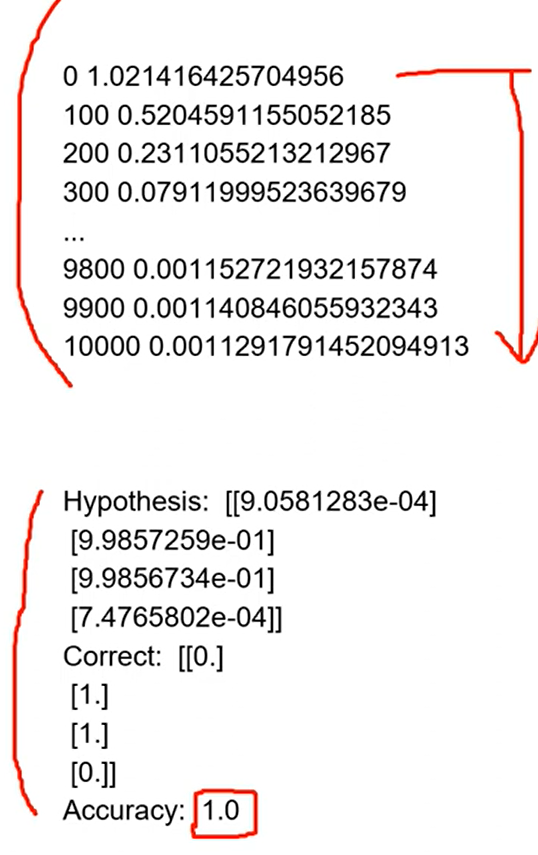

In [1]:
#XOR nn

import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

#for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

#nn layers
linear1 = torch.nn.Linear(2, 2, bias=True)
linear2 = torch.nn.Linear(2, 1, bias=True)      #MLP
sigmoid = torch.nn.Sigmoid()

#model
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid).to(device)

#define cost/loss & optimizer
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)   #modified learning rate from 0.1 to 1

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    #cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())


0 0.7434072494506836
100 0.6931650638580322
200 0.6931577920913696
300 0.6931517124176025
400 0.6931463479995728
500 0.6931411027908325
600 0.693135678768158
700 0.6931295394897461
800 0.693122148513794
900 0.6931126117706299
1000 0.6930999755859375
1100 0.693082332611084
1200 0.6930569410324097
1300 0.6930190920829773
1400 0.6929606199264526
1500 0.6928660273551941
1600 0.6927033066749573
1700 0.6923960447311401
1800 0.6917301416397095
1900 0.6899653673171997
2000 0.6838315725326538
2100 0.6561667919158936
2200 0.43110206723213196
2300 0.13489344716072083
2400 0.06630437076091766
2500 0.04216817021369934
2600 0.030453866347670555
2700 0.023665906861424446
2800 0.019277727231383324
2900 0.01622403785586357
3000 0.013983778655529022
3100 0.012273933738470078
3200 0.01092811580747366
3300 0.009842471219599247
3400 0.008949026465415955
3500 0.008201324380934238
3600 0.007566751446574926
3700 0.007021679542958736
3800 0.006548585835844278
3900 0.0061342460103333
4000 0.00576836708933115
41

In [2]:
#Accuracy computation
#True if hypothesis > 0.5 else False

with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item())



Hypothesis:  [[0.00106364]
 [0.99889404]
 [0.99889404]
 [0.00165861]] 
Correct:  [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:  1.0


In [6]:
#XOR nn wide deep

import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)    

# nn layers (4MLP)
linear1 = torch.nn.Linear(2, 10, bias=True)
linear2 = torch.nn.Linear(10, 10, bias=True)
linear3 = torch.nn.Linear(10, 10, bias=True)
linear4 = torch.nn.Linear(10, 1, bias=True)
sigmoid = torch.nn.Sigmoid()

# model
model = torch.nn.Sequential(linear1, sigmoid, linear2, sigmoid, linear3, sigmoid, linear4, sigmoid).to(device)

# define cost/loss & optimizer
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    # cost/loss function
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.6948983669281006
100 0.693155825138092
200 0.6931535005569458
300 0.6931514143943787
400 0.6931492686271667
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931416392326355
900 0.6931397914886475
1000 0.6931380033493042
1100 0.6931361556053162
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220293045044
1900 0.6931196451187134
2000 0.6931171417236328
2100 0.6931145191192627
2200 0.6931116580963135
2300 0.6931085586547852
2400 0.6931051015853882
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930880546569824
2900 0.6930825710296631
3000 0.6930763125419617
3100 0.6930692791938782
3200 0.6930612325668335
3300 0.6930519342422485
3400 0.6930411458015442
3500 0.693028450012207
3600 0.6930133104324341
3700 0.6929951906204224
3800 0.6929729580879211
3900 0.6929453015327454
4000 0.6929103136062622
4100 0.6928649544715881
4200 0

In [7]:
# Accuracy computation
# True if hypothesis>0.5 else False
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('\nHypothesis: ', hypothesis.detach().cpu().numpy(), '\nCorrect: ', predicted.detach().cpu().numpy(), '\nAccuracy: ', accuracy.item())



Hypothesis:  [[1.11691515e-04]
 [9.99828815e-01]
 [9.99842286e-01]
 [1.85273253e-04]] 
Correct:  [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:  1.0
